In [15]:
# LEVANTAMOS LAS BASES DE LOS CUATRO TRIMESTRES DE VIAJES PRESTADOS POR LINEA#
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
#path= '/content/drive/My Drive/bases_mentoria/primer trimestre 2019'
path= '/content/drive/My Drive/bases_mentoria/Bases Trabajo práctico 2'
import glob
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='latin-1', sep=","))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

big_frame.head()

Mounted at /content/drive/


,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,Porc_tarj_prestadas,LINEA
0,153,234,0.346154,L299
1,2075,2673,0.223719,AeroBus
2,1610,2005,0.197007,L599
3,2075,2374,0.125948,B30
4,256,292,0.123288,B20


In [16]:
del big_frame['Porc_tarj_prestadas']

In [17]:
big_frame.sort_values('LINEA')

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,LINEA
48,86786,92740,A
124,79661,85955,A
263,95372,101933,A
190,91491,97808,A
188,89538,95841,A600
...,...,...,...
106,84003,91556,L84
158,66392,72472,L85
10,60796,66536,L85
86,55841,61796,L85


In [18]:
viajes_compartidos_por_linea=big_frame.groupby('LINEA').sum()

In [19]:
viajes_compartidos_por_linea.head()

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT
LINEA,,
A,353310,378436
A600,326758,350482
A601,317301,340993
AeroBus,9573,12785
B,968033,1032156


In [20]:
viajes_compartidos_por_linea['LINEA']=viajes_compartidos_por_linea.index

In [21]:
viajes_compartidos_por_linea['Porc_compartidos']= (1 - (viajes_compartidos_por_linea.CANT_VIAJES_S_DUPL/viajes_compartidos_por_linea.CANT_VIAJES_TOT)) * 100

In [22]:
# Eliminamos las lineas L599 L299 y B30 que no son relevantes en el análisis ##
viajes_compartidos_por_linea=viajes_compartidos_por_linea.loc[(viajes_compartidos_por_linea.LINEA!="L599") & (viajes_compartidos_por_linea.LINEA!="L299") & (viajes_compartidos_por_linea.LINEA!="B30")]

In [23]:
viajes_compartidos_por_linea= viajes_compartidos_por_linea.sort_values(by='Porc_compartidos', ascending=False)

In [24]:
viajes_compartidos_por_linea.head(10)

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,LINEA,Porc_compartidos
LINEA,,,,
AeroBus,9573,12785,AeroBus,25.123191
L68,249647,280126,L68,10.880461
L16,293582,329157,L16,10.807912
L51,491502,548487,L51,10.389490
L17,604611,665553,L17,9.156596
L54,313753,344780,L54,8.999072
L33,332638,365169,L33,8.908478
L14,1103409,1209704,L14,8.786860
L27,737373,807870,L27,8.726280


In [25]:
## TOMAMOS PARA GRAFICAR LAS 10  LINEAS QUE MAS PRÉSTAMOS DE TARJETAS TUVIERON EN EL PRIMER TRIMESTRE DE 2019##
df_TOP_10=viajes_compartidos_por_linea.loc[viajes_compartidos_por_linea.Porc_compartidos>=8.6891]

In [26]:
df_TOP_10

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,LINEA,Porc_compartidos
LINEA,,,,
AeroBus,9573,12785,AeroBus,25.123191
L68,249647,280126,L68,10.880461
L16,293582,329157,L16,10.807912
L51,491502,548487,L51,10.389490
L17,604611,665553,L17,9.156596
L54,313753,344780,L54,8.999072
L33,332638,365169,L33,8.908478
L14,1103409,1209704,L14,8.786860
L27,737373,807870,L27,8.726280


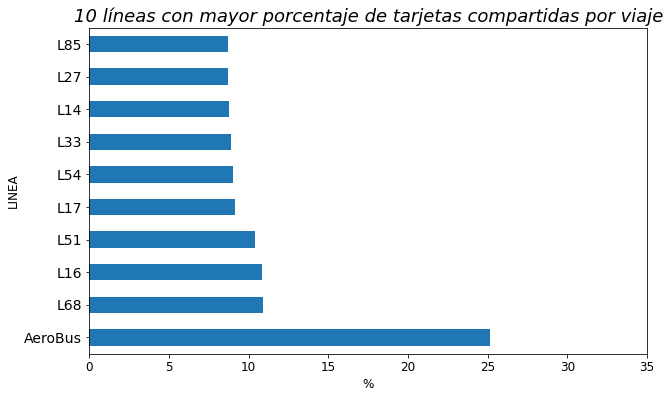

In [27]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = df_TOP_10.Porc_compartidos.plot.barh(rot=0)
plt.title('10 líneas con mayor porcentaje de tarjetas compartidas por viaje', fontsize=18,fontstyle='italic')
plt.xlabel('%', fontsize=12)
plt.ylabel('LINEA', fontsize=12)
#plt.legend('Primer trimestre de 2019')
ax.set_xlim(0,35)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()
##Ya lo hicimos por LINEA, hacer lo mismo por horas del dia y por dia de la semana##